In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Linear regression

weight = 0.7
bias = 0.3

# Create

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

In [4]:
# Training and test sets #

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize

In [5]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    plt.legend(prop={"size": 14})


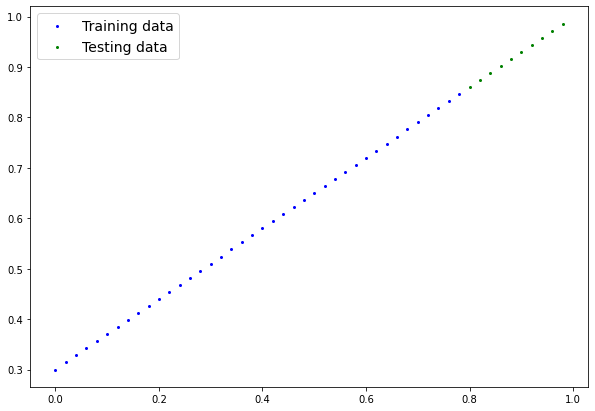

In [6]:
plot_prediction()

Build linear regression model

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # LINEAR REGRESSION FORMULA

In [79]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [80]:
model_0.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))]),
 0.7,
 0.3)

In [81]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

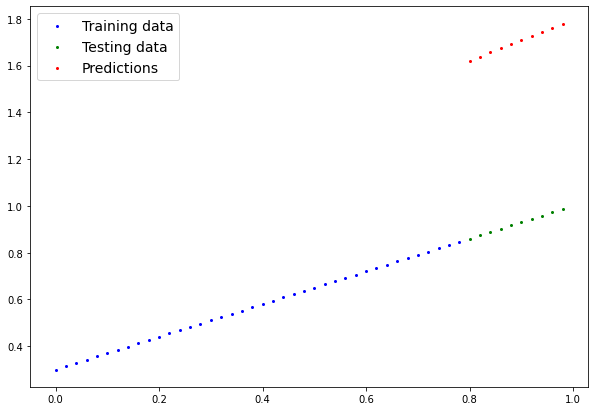

In [82]:
plot_prediction(predictions=y_preds)

In [83]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [84]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

Training Loop

In [85]:
torch.manual_seed(42)
epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train() # Sets parameters that require gradience to require gradient

    # Forward pass
    y_pred = model_0(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()

    # Perform backpropagation on the loss with respect to parameters
    loss.backward() # Start fresh each iteration

    # Step the optimizer (perform gradient descend)
    optimizer.step() # By default will accumulate through the loop, so zero them above

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f'Epoch {epoch} | Loss: {test_loss}')
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)


model_0.eval() # Turns off gradient tracking

Epoch 0 | Loss: 0.7637526988983154
Epoch 10 | Loss: 0.6290428042411804
Epoch 20 | Loss: 0.4943329691886902
Epoch 30 | Loss: 0.35962313413619995
Epoch 40 | Loss: 0.2249133139848709
Epoch 50 | Loss: 0.09020347893238068
Epoch 60 | Loss: 0.020998019725084305
Epoch 70 | Loss: 0.014099234715104103
Epoch 80 | Loss: 0.005826681852340698
Epoch 90 | Loss: 0.00754010071977973


LinearRegressionModel()

In [86]:
torch.tensor(loss_values).numpy()

array([0.6860889 , 0.5708791 , 0.45566922, 0.34045935, 0.22524948,
       0.11003961, 0.00972499, 0.00621675, 0.00278832, 0.00709595],
      dtype=float32)

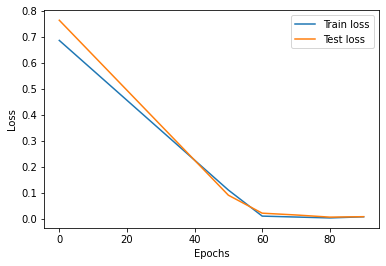

In [87]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [88]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.6977], requires_grad=True),
 Parameter containing:
 tensor([0.3080], requires_grad=True)]

In [89]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.6977], requires_grad=True),
 Parameter containing:
 tensor([0.3080], requires_grad=True)]

In [90]:
predictions = model_0(X_test)
predictions, y_test

(tensor([[0.8661],
         [0.8801],
         [0.8940],
         [0.9080],
         [0.9220],
         [0.9359],
         [0.9499],
         [0.9638],
         [0.9778],
         [0.9917]], grad_fn=<AddBackward0>),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [91]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


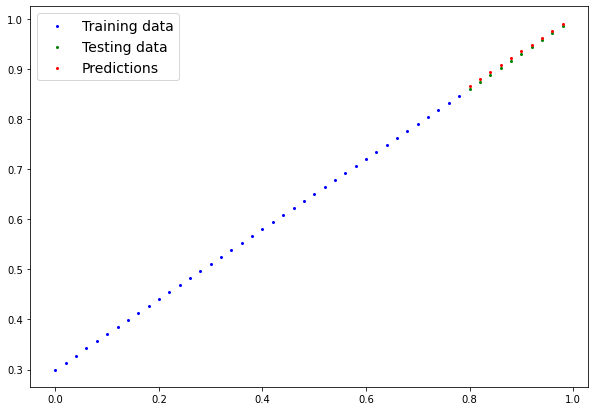

In [92]:
plot_prediction(predictions=y_preds_new)